# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

Iter     Function value   Gradient norm 
     0     3.179988e+01     8.077893e+00
 * time: 0.004166126251220703
     1     2.918370e+01     7.908920e+00
 * time: 0.012197017669677734
     2     1.659130e+01     6.047068e+00
 * time: 0.034970998764038086
     3     1.275380e+01     3.505374e+00
 * time: 0.05409598350524902
     4     1.102643e+01     2.481023e+00
 * time: 0.07346415519714355
     5     1.008100e+01     1.333536e+00
 * time: 0.08893513679504395
     6     9.594651e+00     1.119075e+00
 * time: 0.10435700416564941
     7     9.254824e+00     7.186560e-01
 * time: 0.1197509765625
     8     9.142737e+00     1.389850e+00
 * time: 0.13148117065429688
     9     9.067559e+00     1.363998e+00
 * time: 0.14319801330566406
    10     8.959171e+00     6.046232e-01
 * time: 0.15860700607299805
    11     8.851106e+00     7.883409e-01
 * time: 0.17027020454406738
    12     8.760874e+00     7.289026e-01
 * time: 0.18187618255615234
    13     8.691581e+00     4.891525e-01
 * time: 

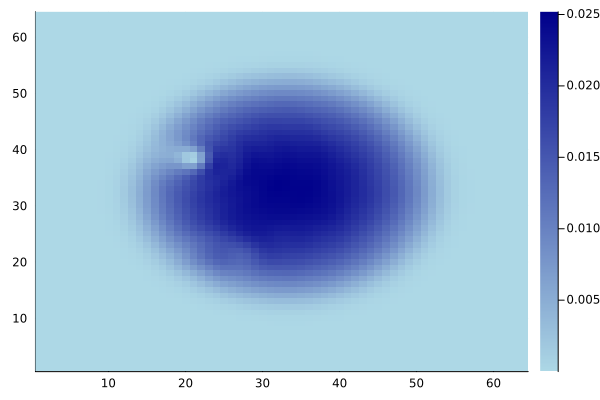

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential, and magnetic vector potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);


# Parameters
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

# Collect all the terms, build and run the model
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # spinless electrons
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)